<a href="https://colab.research.google.com/github/tsenga2/keio-quant-macro/blob/main/HPfilter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

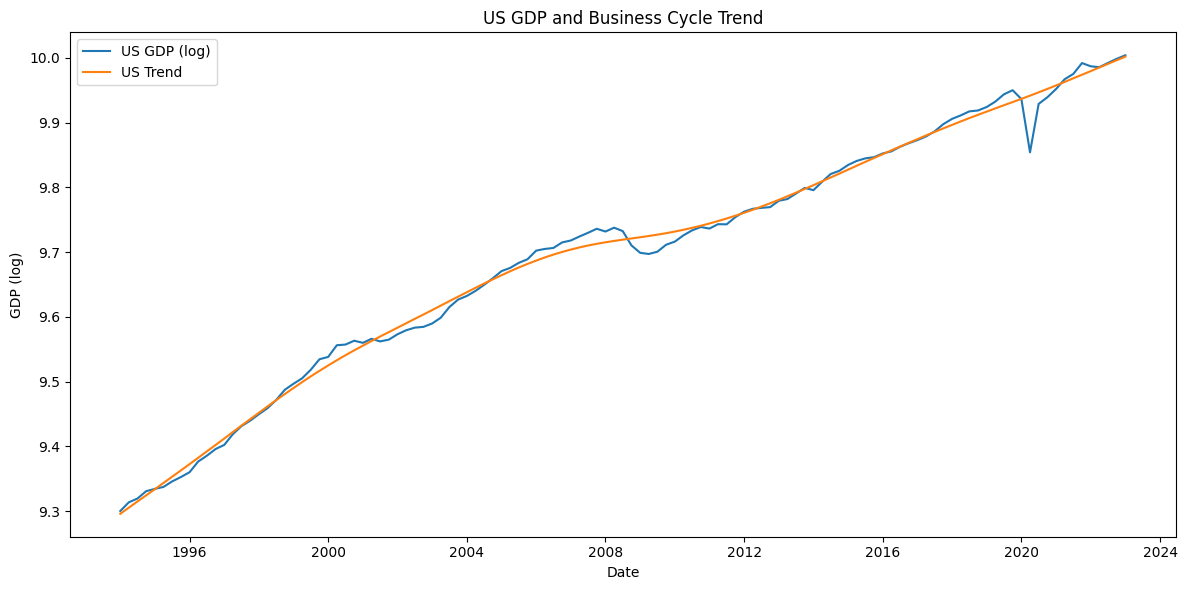

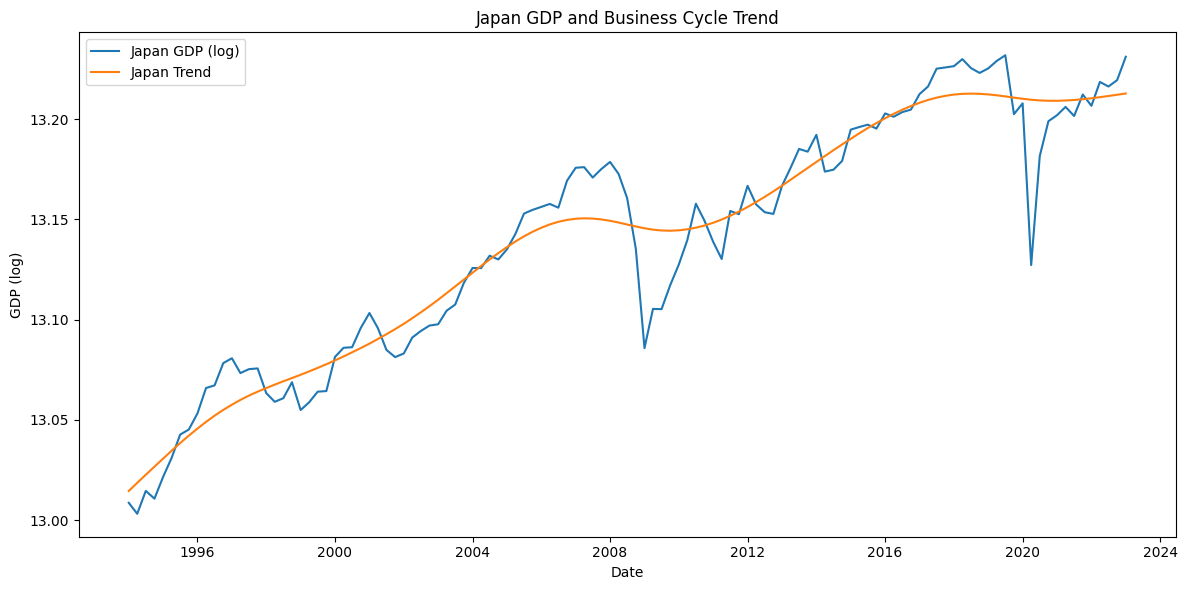

In [7]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

# set the start and end dates for the data
start_date = '1994-01-01'
end_date = '2023-01-01'

# download the data from FRED using pandas_datareader
gdp_us = web.DataReader('GDPC1', 'fred', start_date, end_date)
gdp_jp = web.DataReader('JPNRGDPEXP', 'fred', start_date, end_date)
log_gdp_us = np.log(gdp_us)
log_gdp_jp = np.log(gdp_jp)

# calculate the quarterly percent change in real GDP
gdp_pct_change_us = gdp_us.pct_change(4)
gdp_pct_change_jp = gdp_jp.pct_change(4)

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
cycle_us, trend_us = sm.tsa.filters.hpfilter(log_gdp_us, lamb=1600)
cycle_jp, trend_jp = sm.tsa.filters.hpfilter(log_gdp_jp, lamb=1600)

# Create plots using Matplotlib
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(log_gdp_us.index, log_gdp_us.values.flatten(), label='US GDP (log)')
ax.plot(trend_us.index, trend_us.values.flatten(), label='US Trend')
ax.set_title('US GDP and Business Cycle Trend')
ax.set_xlabel('Date')
ax.set_ylabel('GDP (log)')
ax.legend()
plt.tight_layout()
plt.show()  # Display the plot

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(log_gdp_jp.index, log_gdp_jp.values.flatten(), label='Japan GDP (log)')
ax.plot(trend_jp.index, trend_jp.values.flatten(), label='Japan Trend')
ax.set_title('Japan GDP and Business Cycle Trend')
ax.set_xlabel('Date')
ax.set_ylabel('GDP (log)')
ax.legend()
plt.tight_layout()
plt.show()  # Display the plot

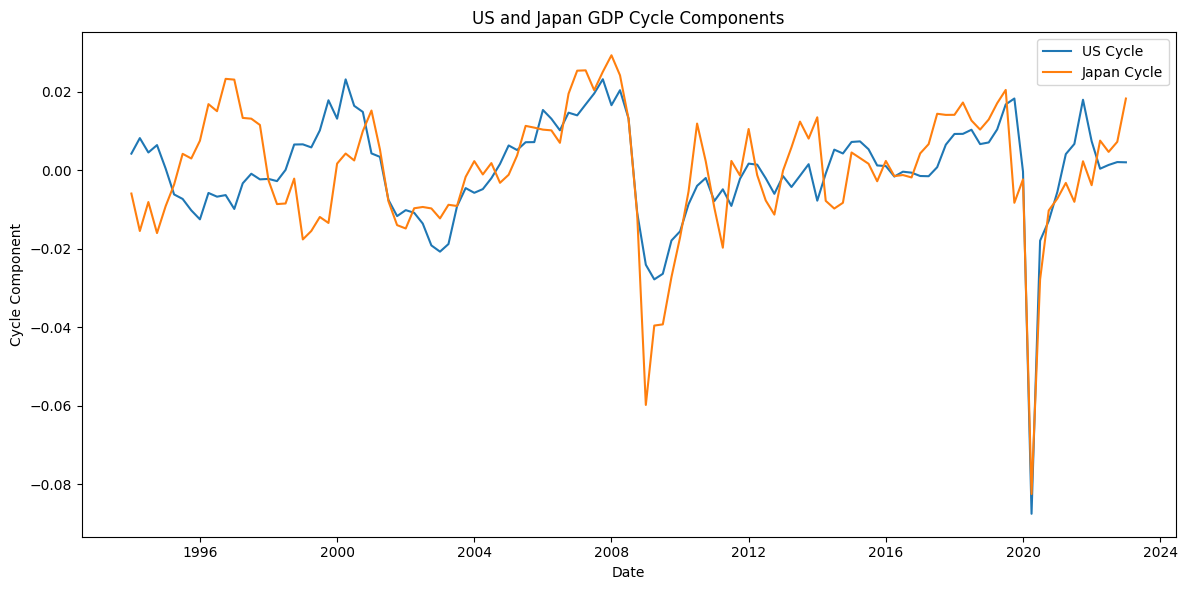

US Cycle Mean: -3.553928281767612e-13
US Cycle Standard Deviation: 0.013354141433165642

Japan Cycle Mean: -3.329378558222914e-13
Japan Cycle Standard Deviation: 0.016139951705320423

Correlation coefficient between US and Japan cycle components: 0.690932091798967


In [8]:
# Create a plot for the cyclical components
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(cycle_us.index, cycle_us.values.flatten(), label='US Cycle')
ax.plot(cycle_jp.index, cycle_jp.values.flatten(), label='Japan Cycle')
ax.set_title('US and Japan GDP Cycle Components')
ax.set_xlabel('Date')
ax.set_ylabel('Cycle Component')
ax.legend()
plt.tight_layout()
plt.show()

# Analyze the cycle components
cycle_us_mean = cycle_us.mean()
cycle_us_std = cycle_us.std()
print("US Cycle Mean:", cycle_us_mean)
print("US Cycle Standard Deviation:", cycle_us_std)

cycle_jp_mean = cycle_jp.mean()
cycle_jp_std = cycle_jp.std()
print("\nJapan Cycle Mean:", cycle_jp_mean)
print("Japan Cycle Standard Deviation:", cycle_jp_std)

corr_coef = cycle_us.corr(cycle_jp)
print(f"\nCorrelation coefficient between US and Japan cycle components: {corr_coef}")